In [9]:
# imports - standard
import numpy as np
import pandas as pd

# imports - custom
import sys
sys.path.append("../code")
from hierarchical_bootstrap import hierarchical_bootstrap

# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# create example dataframe of random hierarchical data
 
# settings
n_conditions = 2
n_clusters = 10
n_instances = 10

# simulate data 
rng = np.random.default_rng(0)
data_0 = rng.normal(0, 1, n_clusters * n_instances)
data_1 = rng.normal(0, 1, n_clusters * n_instances)

# create dataframe
data = np.concatenate([data_0, data_1])
condition = np.concatenate([np.zeros(n_clusters * n_instances), 
                            np.ones(n_clusters * n_instances)]).astype(int)
cluster = np.tile(np.repeat(np.arange(n_clusters), n_instances), n_conditions)
instance = np.tile(np.tile(np.arange(n_instances), n_clusters), n_conditions)
df = pd.DataFrame({"data": data, "condition": condition, "cluster": cluster, "instance": instance})
df


,data,condition,cluster,instance
0,0.125730,0,0,0
1,-0.132105,0,0,1
2,0.640423,0,0,2
3,0.104900,0,0,3
4,-0.535669,0,0,4
...,...,...,...,...
195,1.643252,1,9,5
196,-1.282649,1,9,6
197,-0.585658,1,9,7
198,-0.472588,1,9,8


p-value: 0.272


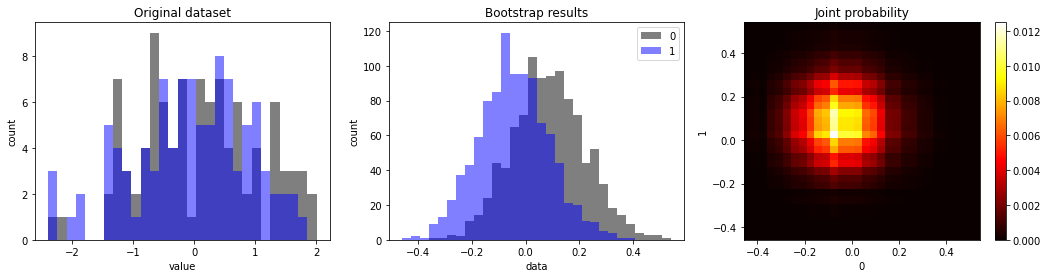

In [15]:
# apply hierarchical bootstrap
res = hierarchical_bootstrap(df, 'data', 'cluster', 'instance', 'condition')

p-value: 0.256
True mean difference: -0.13
Condition '0' < '1'


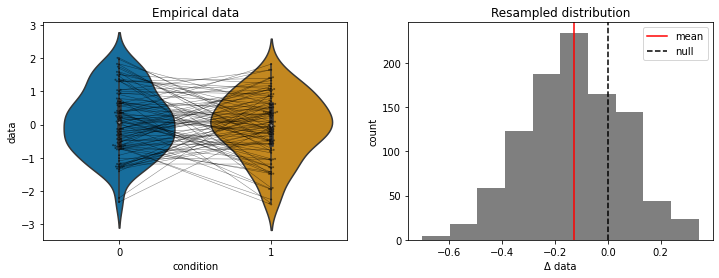

In [16]:
# apply paired hierarchical bootstrap
res = hierarchical_bootstrap(df, 'data', 'cluster', 'instance', 'condition',
                             paired=True)

p-value: 0.020


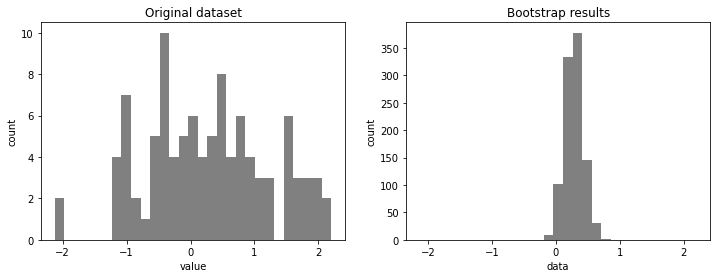

In [18]:
# apply hierarchical bootstrap (one-sample t-test)

# settings
n_clusters = 10
n_instances = 10

# simulate data 
rng = np.random.default_rng(0)
data = rng.normal(0.2, 1, n_clusters * n_instances)

# create dataframe
cluster = np.repeat(np.arange(n_clusters), n_instances)
instance = np.tile(np.arange(n_instances), n_clusters)
df = pd.DataFrame({"data": data, "cluster": cluster, "instance": instance})

# apply hierarchical bootstrap
res = hierarchical_bootstrap(df, 'data', 'cluster', 'instance', one_sample=True)